# CIS*4020 Assignment 2

## [36 Marks]

## Import libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.manifold import TSNE
# You may need some sklearn specific imports, or other standard toolboxes

## Load dataset

In [2]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

In [3]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

#x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
#x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [4]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 2304)
(28709, 7)
(3589, 2304)
(3589, 7)


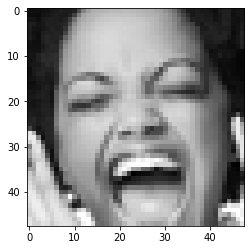

facial emotion: fear


In [5]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

In [6]:
trainingset2 = trainingset[(trainingset[:,2307] > 0) | (trainingset[:,2308] > 0)]

x_training2 = trainingset2[:, 0:n_inputs]
y_training2 = trainingset2[:, n_inputs:n_inputs + n_classes]

testingset2 = testingset[(testingset[:,2307] > 0) | (testingset[:,2308] > 0)]

x_testing2 = testingset2[:, 0:n_inputs]
y_testing2 = testingset2[:, n_inputs:n_inputs + n_classes]

[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

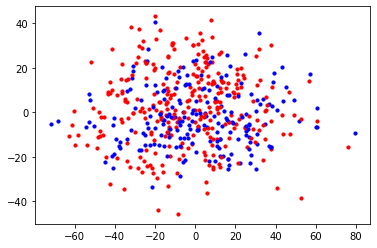

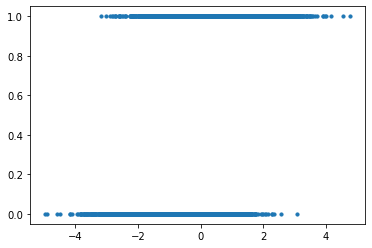

In [7]:
x_pca = StandardScaler().fit_transform(x_training2)

pcamodel = PCA(n_components = 2)

prinCom = pcamodel.fit_transform(x_pca)

prinDf = pd.DataFrame(data = prinCom, columns = ['p1', 'p2'])

for i in range(500):
    if y_training2[i][3] == 1.0:
        colour = 'r'
    else:
        colour = 'b'
    plt.scatter(prinDf.p1[i], prinDf.p2[i], s = 10, c = colour)
plt.show()

lda = LDA(n_components = 1)

x_lda = lda.fit_transform(x_training2, y_training2[::,3])

df = pd.DataFrame(data = x_lda, columns = ['p1'])

plt.scatter(df.p1, y_training2[::,3], s = 10)

plt.show()



[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [8]:
x_train_nb = StandardScaler().fit_transform(x_training2)
x_test_nb = StandardScaler().fit_transform(x_testing2)

nb = GaussianNB()
nb.fit(x_train_nb, y_training2[::,3])
y_pred = nb.predict(x_test_nb)

acc = accuracy_score(y_testing2[::,3], y_pred) * 100
print('Accuracy = ', acc, '%')

Accuracy =  59.23772609819121 %


[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [9]:
log_reg = LogisticRegression(solver = 'lbfgs', max_iter = 2000)
log_reg.fit(x_pca, y_training2[::,3])

lr_acc = log_reg.score(x_pca, y_training2[::,3]) * 100
print('Accuracy = ', lr_acc, '%')

Accuracy =  79.80074719800747 %


[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [10]:
#supportvm = svm.SVC(kernel = 'linear')

#supportvm.fit(x_training,y_training[::,3])

#y_pred_svm = supportvm.predict(x_training)

#acc_svm = accuracy_score(y_testing[::,3], y_pred_svm) * 100
#print('Accuracy =', acc_svm, '%')

[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

Linear regression since it is the most accurate 

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

[[0.12481721 0.87518279]
 [0.47763299 0.52236701]
 [0.53060039 0.46939961]
 ...
 [0.94021403 0.05978597]
 [0.57659826 0.42340174]
 [0.56996598 0.43003402]]
1.0


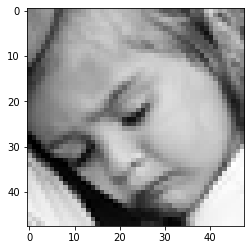

facial emotion: sad


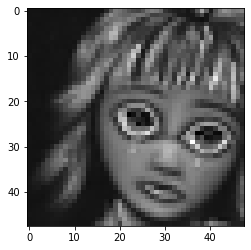

facial emotion: sad


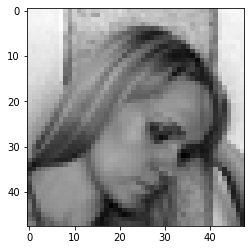

facial emotion: sad


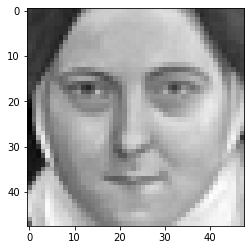

facial emotion: sad


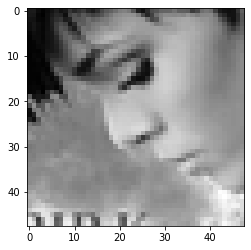

facial emotion: sad


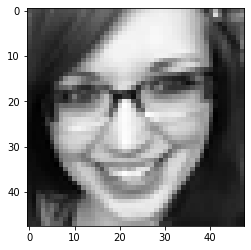

facial emotion: happy


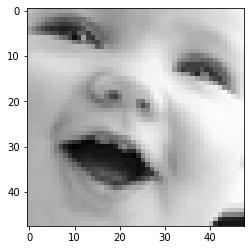

facial emotion: happy


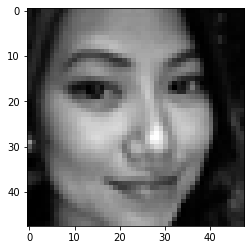

facial emotion: happy


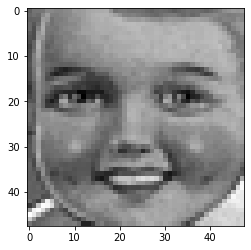

facial emotion: happy


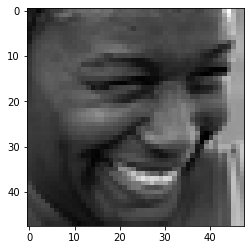

facial emotion: happy


In [24]:
y_new = log_reg.predict(x_pca)
prob = log_reg.predict_proba(x_pca)

#print(y_new[0])
#print(y_testing[2][3])
ind_happy = []
ind_sad = []

#to find which predicted value was correct
for i in range(len(y_testing2)):
    if y_testing2[i][3] == y_new[i]:
        if y_new[i] == 0:
            ind_sad.append(i)
        elif y_new[i] == 1:
            ind_happy.append(i)
for i in range(5):            
    sample_sad = x_testing2[ind_sad[i], :]
    sample_sad = sample_sad.reshape(48, 48)

    plt.imshow(sample_sad, cmap='gray')
    plt.show()
    print('facial emotion: %s' % get_emotion(y_testing2[ind_sad[i], :]))
for i in range(5):            
    sample_happy = x_testing2[ind_happy[i], :]
    sample_happy = sample_happy.reshape(48, 48)

    plt.imshow(sample_happy, cmap='gray')
    plt.show()
    print('facial emotion: %s' % get_emotion(y_testing2[ind_happy[i], :]))

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

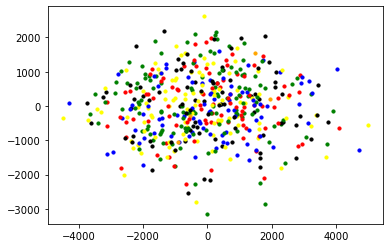

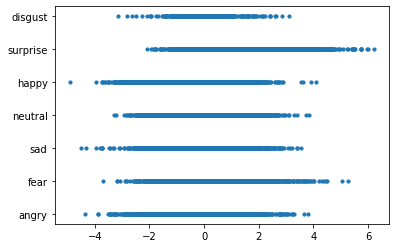

In [12]:
#print(get_emotion(y_training[2, :]))
x_multi_pca = StandardScaler().fit_transform(x_training)
multi_pca = PCA(n_components = 2)

multi_prinCom = multi_pca.fit_transform(x_training)

multi_prinDf = pd.DataFrame(data = multi_prinCom, columns = ['p1','p2'])
emotion = []
for i in range(len(y_training)):
    emotion.append(get_emotion(y_training[i, :]))
    
emotion_df = pd.DataFrame(data = emotion, columns = ['emotion'])

finalDf = pd.concat([multi_prinDf, emotion_df], axis = 1)

for i in range(500):
    if finalDf.emotion[i] == 'angry':
        colour = 'red'
    elif finalDf.emotion[i] == 'disgust':
        colour = 'orange'
    elif finalDf.emotion[i] == 'fear':
        colour = 'yellow'
    elif finalDf.emotion[i] == 'happy':
        colour = 'green'
    elif finalDf.emotion[i] == 'sad':
        colour = 'blue'
    elif finalDf.emotion[i] == 'surpise':
        colour = 'violet'
    elif finalDf.emotion[i] == 'neutral':
        colour = 'black'
    plt.scatter(finalDf.p1[i], finalDf.p2[i], s = 10, c = colour)
plt.show()

multi_lda = LDA(n_components = 1)

x_multi_lda = multi_lda.fit_transform(x_training, emotion)

multi_df = pd.DataFrame(data = x_multi_lda, columns = ['p1'])

plt.scatter(multi_df.p1, emotion, s = 10)

plt.show()


[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [13]:
nb_multi = GaussianNB()
nb_multi.fit(x_training, emotion)
emotion_test = []
for i in range(len(y_testing)):
    emotion_test.append(get_emotion(y_testing[i, :]))
ymulti_pred = nb_multi.predict(x_testing)
nb_acc = accuracy_score(emotion_test, ymulti_pred) * 100
print('Accuracy = ', nb_acc, '%')

Accuracy =  22.736138200055724 %


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
From the confusion matrix, we can that using Naive Bayes, faces that were happy, sad, surprised, and netural were the most correct. We can also see that in most cases, the predict emotion would tend towards netural

In [14]:
con_matrix = confusion_matrix(emotion_test, ymulti_pred)
print(con_matrix)

[[ 20  51  29  50  42 136 139]
 [  2  12   2   4   4  14  18]
 [ 21  36  33  30  47 116 213]
 [ 21 103  25 143 120 212 271]
 [ 17  62  23  52  98 174 181]
 [ 33  66  31  63  64 257 139]
 [ 15  30  12  22  40  43 253]]


[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [15]:
logReg = LogisticRegression(solver = 'lbfgs', max_iter = 2000)
logReg.fit(x_multi_pca, emotion)

logacc = logReg.score(x_multi_pca, emotion) * 100
print('Accuracy = ', logacc, '%')

Accuracy =  50.973562297537356 %


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
Happy and netural faces can be easily classified, and again we see a number of cases where the incorrectly predicted emotion was netural

In [16]:
log_pred = logReg.predict(x_testing)
log_cmatrix = confusion_matrix(emotion_test, log_pred)
print(log_cmatrix)

[[ 20 100  36  41   6   4 260]
 [  0  29   3   3   0   0  21]
 [ 10  90  52  26   3   3 312]
 [ 19 132  57 179  11   6 491]
 [ 13  90  42  41  10   1 410]
 [ 12 125  47  38  13  11 407]
 [  2  22  14  10   0   1 366]]


[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [17]:
#code

test


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

[2 Marks] e. Which categories of faces seem to be most similar or least similar?
Based on all confusion matrix produced, netural faces are similar to all other faces. Happy and digust are closely related. Digust is the least common face with any others.

[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

In [54]:
probn = logReg.predict_proba(x_multi_pca)

n_sample = 4
max_prob = max(probn[n_sample])
for i in range(len(probn[n_sample])):
    if probn[n_sample][i] == max_prob:
        pos = i

if pos == 0:
    p_emotion = 'angry'
elif pos == 1:
    p_emotion = 'disgust'
elif pos == 2:
    p_emotion = 'fear'
elif pos == 3:
    p_emotion = 'happy'
elif pos == 4:
    p_emotion = 'sad'
elif pos == 5:
    p_emotion = 'surpise'
elif pos == 6:
    p_emotion = 'netural'


# Challenge question (required)

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[6 Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

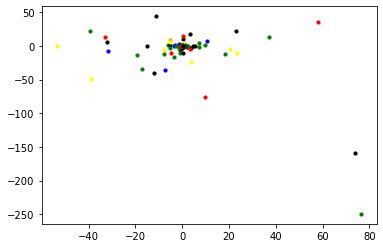

In [53]:
tsne = TSNE(n_components = 2, verbose = 0, perplexity = 40, n_iter = 250)
results = tsne.fit_transform(x_multi_pca[0:1000])

for i in range(1000):
    if emotion[i] == 'angry':
        colour = 'red'
    elif emotion[i] == 'disgust':
        colour = 'orange'
    elif emotion[i] == 'fear':
        colour = 'yellow'
    elif emotion[i] == 'happy':
        colour = 'green'
    elif emotion[i] == 'sad':
        colour = 'blue'
    elif emotion[i] == 'surpise':
        colour = 'violet'
    elif emotion[i] == 'neutral':
        colour = 'black'
    plt.scatter(results[i][0], results[i][1], s = 10, c = colour)
plt.show()
